Label Target: Total_Returns_NextYear

XGBoost Regressor
Option 1.1 == 44.75%
Train until 2022 + 
test on 2023 Total_Returns to predict Total_Returns_NextYear
Predicted 2023 Total_Returns_NextYear: 338260.3
Actual 2023 Total_Returns_NextYear: 755909.0

Option 1.2 + log transformation by GPT == 68,31%
Predicted 2023 Total_Returns_NextYear (log adjusted): 516336.2
Actual 2023 Total_Returns_NextYear: 755909.0

Option 1.3 + using less features top 5 == 32.65%
Predicted 2023 Total_Returns_NextYear: 246804.7
Actual 2023 Total_Returns_NextYear: 755909.0



option 2 80% and 20%

option 3 hot encoder for each age keep all age


OPTION 1
df_columbiariver_opt1

Start with XGBoost Regressor
Train until 2022 + 
test on 2023 Total_Returns to predict Total_Returns_NextYear

X_train used to train the mode (all features column's)
Y_train used to train the mode (all label target rows)
X_test used to test the model last year 2023
y_test used to validate the accuracy result vs predict

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load cleaned dataset with ReturnYear + ReturnCount
df_columbiariver_opt1 = pd.read_csv(r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\data\ColumbiaRiver_FeatureSet_For_Model.csv')



In [2]:
df_columbiariver_opt1

,River,Year,Total_Returns,AgeClass_0.1,AgeClass_0.2,AgeClass_0.3,AgeClass_0.4,AgeClass_0.5,AgeClass_1.1,AgeClass_1.3,...,mei_mean_AprSep,npgo_mean_DecFeb,ao_mean_DecMar,pdo_mean_DecMar,pdo_mean_MaySep,sst_aprjul,sst_anom,sss_aprjun,sss_mayaug,Total_Spawners_BroodYear
0,Bonneville Lock & Dam,1985,166340.0,0.0,0.0,0.0,0.0,0.0,1461.0,1732.0,...,-0.635000,0.170518,-0.81225,0.3725,0.002,12.268483,-0.464135,NaN,NaN,2.535160e+08
1,Bonneville Lock & Dam,1986,58123.0,0.0,0.0,0.0,0.0,0.0,24062.0,9094.0,...,0.315000,-1.299489,-0.87225,1.1300,0.460,12.450839,-0.281779,NaN,NaN,1.401720e+08
2,Bonneville Lock & Dam,1987,116993.0,0.0,0.0,0.0,0.0,0.0,22999.0,2611.0,...,1.728333,0.332657,-1.07675,1.4975,1.086,12.612856,-0.119761,NaN,NaN,2.072466e+08
3,Bonneville Lock & Dam,1988,79714.0,0.0,0.0,0.0,0.0,0.0,547.0,13259.0,...,-1.160000,0.864786,-0.38300,0.5325,-0.286,12.518272,-0.214346,NaN,NaN,1.737483e+08
4,Bonneville Lock & Dam,1989,41884.0,0.0,0.0,0.0,0.0,0.0,298.0,3809.0,...,-0.896667,0.909874,2.39850,-1.0175,-0.086,12.952309,0.219692,NaN,NaN,2.955481e+08
5,Bonneville Lock & Dam,1990,49581.0,0.0,0.0,0.0,0.0,0.0,7260.0,5001.0,...,0.111667,-0.061326,1.68725,-0.7600,-0.314,12.745895,0.013278,NaN,NaN,2.794689e+08
6,Bonneville Lock & Dam,1991,76481.0,0.0,0.0,0.0,0.0,0.0,4072.0,13678.0,...,0.556667,-0.860520,0.14925,-1.5550,-1.136,11.969433,-0.763185,NaN,NaN,2.716528e+08
7,Bonneville Lock & Dam,1992,84992.0,0.0,0.0,0.0,0.0,0.0,5170.0,5755.0,...,1.026667,-0.058810,1.06725,0.0400,1.056,13.732517,0.999900,NaN,NaN,2.152034e+08
8,Bonneville Lock & Dam,1993,80178.0,0.0,0.0,0.0,0.0,0.0,0.0,8043.0,...,1.011667,-2.275497,1.51750,0.0775,1.686,13.359549,0.626931,NaN,NaN,2.791706e+08
9,Bonneville Lock & Dam,1994,12678.0,0.0,0.0,0.0,0.0,0.0,440.0,8583.0,...,0.526667,-1.944411,0.15675,0.5300,-0.530,12.846726,0.114109,NaN,NaN,2.823149e+08


In [3]:
print(df_columbiariver_opt1.columns)


Index(['River', 'Year', 'Total_Returns', 'AgeClass_0.1', 'AgeClass_0.2',
       'AgeClass_0.3', 'AgeClass_0.4', 'AgeClass_0.5', 'AgeClass_1.1',
       'AgeClass_1.3', 'AgeClass_1.4', 'AgeClass_1.5', 'AgeClass_2.1',
       'AgeClass_2.2', 'AgeClass_2.3', 'AgeClass_2.4', 'AgeClass_3.1',
       'AgeClass_3.2', 'AgeClass_3.4', 'Total_Returns_NextYear',
       'Pacea_ALPI_Anomaly', 'npi_mean_NovMar', 'oni_mean_DecFeb',
       'mei_mean_AprSep', 'npgo_mean_DecFeb', 'ao_mean_DecMar',
       'pdo_mean_DecMar', 'pdo_mean_MaySep', 'sst_aprjul', 'sst_anom',
       'sss_aprjun', 'sss_mayaug', 'Total_Spawners_BroodYear'],
      dtype='object')


Checking the null values

In [4]:
print(df_columbiariver_opt1.isnull().sum())


River                        0
Year                         0
Total_Returns                0
AgeClass_0.1                 0
AgeClass_0.2                 0
AgeClass_0.3                 0
AgeClass_0.4                 0
AgeClass_0.5                 0
AgeClass_1.1                 0
AgeClass_1.3                 0
AgeClass_1.4                 0
AgeClass_1.5                 0
AgeClass_2.1                 0
AgeClass_2.2                 0
AgeClass_2.3                 0
AgeClass_2.4                 0
AgeClass_3.1                 0
AgeClass_3.2                 0
AgeClass_3.4                 0
Total_Returns_NextYear       0
Pacea_ALPI_Anomaly           1
npi_mean_NovMar              0
oni_mean_DecFeb              0
mei_mean_AprSep              0
npgo_mean_DecFeb             0
ao_mean_DecMar               0
pdo_mean_DecMar              0
pdo_mean_MaySep              0
sst_aprjul                   0
sst_anom                     0
sss_aprjun                  39
sss_mayaug                  39
Total_Sp

Filling out columns:
Pacea_ALPI_Anomaly and Total_Spawners_BroodYear  using mean (only one value its missing)

In [5]:
df_columbiariver_opt1['Pacea_ALPI_Anomaly'].fillna(df_columbiariver_opt1['Pacea_ALPI_Anomaly'].mean(), inplace=True)
df_columbiariver_opt1['Total_Spawners_BroodYear'].fillna(df_columbiariver_opt1['Total_Spawners_BroodYear'].mean(), inplace=True)


C:\Users\MuriloFarias\AppData\Local\Temp\ipykernel_18152\3690595864.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_columbiariver_opt1['Pacea_ALPI_Anomaly'].fillna(df_columbiariver_opt1['Pacea_ALPI_Anomaly'].mean(), inplace=True)
C:\Users\MuriloFarias\AppData\Local\Temp\ipykernel_18152\3690595864.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the int

droping columns sss_aprjun and sss_mayaug

In [6]:
columns_to_drop = ['sss_aprjun', 'sss_mayaug']
df_columbiariver_opt1 = df_columbiariver_opt1.drop(columns=columns_to_drop)

In [7]:
print(df_columbiariver_opt1.isnull().sum())


River                       0
Year                        0
Total_Returns               0
AgeClass_0.1                0
AgeClass_0.2                0
AgeClass_0.3                0
AgeClass_0.4                0
AgeClass_0.5                0
AgeClass_1.1                0
AgeClass_1.3                0
AgeClass_1.4                0
AgeClass_1.5                0
AgeClass_2.1                0
AgeClass_2.2                0
AgeClass_2.3                0
AgeClass_2.4                0
AgeClass_3.1                0
AgeClass_3.2                0
AgeClass_3.4                0
Total_Returns_NextYear      0
Pacea_ALPI_Anomaly          0
npi_mean_NovMar             0
oni_mean_DecFeb             0
mei_mean_AprSep             0
npgo_mean_DecFeb            0
ao_mean_DecMar              0
pdo_mean_DecMar             0
pdo_mean_MaySep             0
sst_aprjul                  0
sst_anom                    0
Total_Spawners_BroodYear    0
dtype: int64


Check column with total = 0

In [8]:
zero_sum = df_columbiariver_opt1.sum(numeric_only=True)
print(zero_sum[zero_sum == 0])


AgeClass_0.1    0.0
AgeClass_0.2    0.0
AgeClass_0.3    0.0
AgeClass_0.4    0.0
AgeClass_0.5    0.0
AgeClass_1.4    0.0
AgeClass_1.5    0.0
AgeClass_2.4    0.0
AgeClass_3.4    0.0
dtype: float64


In [9]:
df_columbiariver_opt1 = df_columbiariver_opt1.drop(columns=[
    'AgeClass_0.1',
    'AgeClass_0.2',
    'AgeClass_0.3',
    'AgeClass_0.4',
    'AgeClass_0.5',
    'AgeClass_1.4',
    'AgeClass_1.5',
    'AgeClass_2.4',
    'AgeClass_3.4'
])


Correlation with Total_Returns_NextYear:
Total_Returns_NextYear      1.000000
AgeClass_1.1                0.743228
Year                        0.657532
AgeClass_1.3                0.527285
Total_Returns               0.479619
npi_mean_NovMar             0.375074
AgeClass_2.1                0.241898
AgeClass_2.2                0.167918
AgeClass_3.1               -0.078549
ao_mean_DecMar             -0.121911
npgo_mean_DecFeb           -0.122259
AgeClass_3.2               -0.147301
sst_aprjul                 -0.172417
sst_anom                   -0.172417
Pacea_ALPI_Anomaly         -0.175486
mei_mean_AprSep            -0.218337
AgeClass_2.3               -0.236076
oni_mean_DecFeb            -0.237507
Total_Spawners_BroodYear   -0.329821
pdo_mean_MaySep            -0.421949
pdo_mean_DecMar            -0.455388
Name: Total_Returns_NextYear, dtype: float64


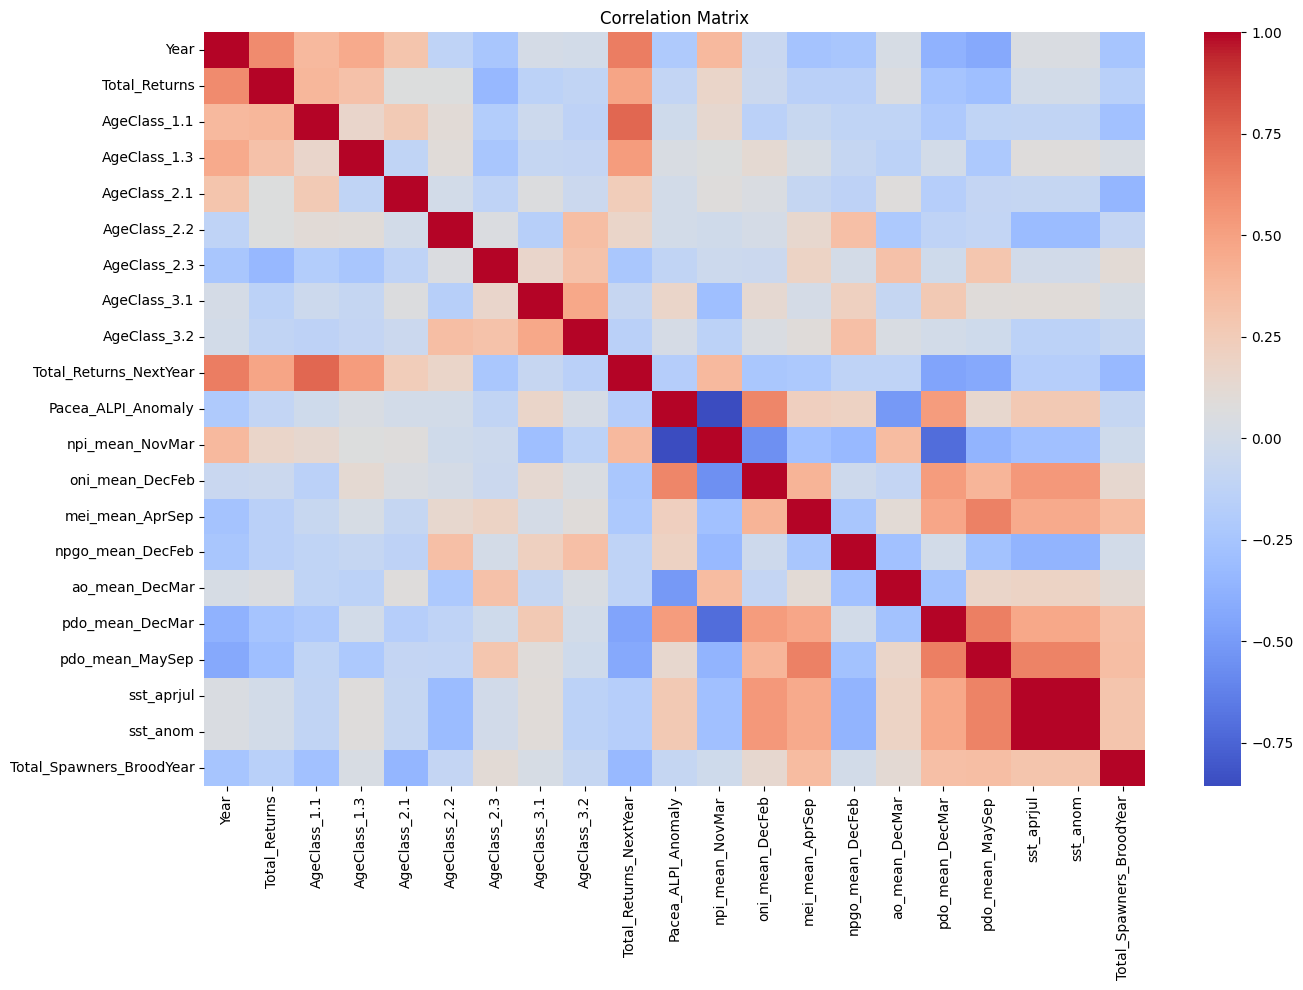

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_columbiariver_opt1.corr(numeric_only=True)

# If you have the 'Total_Returns_NextYear' column, sort by it
if 'Total_Returns_NextYear' in correlation_matrix.columns:
    sorted_corr = correlation_matrix['Total_Returns_NextYear'].sort_values(ascending=False)
    print("Correlation with Total_Returns_NextYear:")
    print(sorted_corr)
else:
    print("🧮 Full Correlation Matrix:")
    print(correlation_matrix)

# (Optional) Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()


Option 1.1
df_columbiariver_opt1

Start with XGBoost Regressor
Train until 2022 + 
test on 2023 Total_Returns to predict Total_Returns_NextYear

X_train used to train the mode (all features column's)
Y_train used to train the mode (all label target rows)
X_test used to test the model last year 2023
y_test used to validate the accuracy result vs predict

In [11]:
!pip install xgboost


You should consider upgrading via the 'C:\Users\MuriloFarias\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [12]:
# STEP 1: Prepare the features and labels
import pandas as pd
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [13]:
# Define the target and features
target_col = 'Total_Returns_NextYear'
feature_cols = [col for col in df_columbiariver_opt1.columns if col not in [target_col, 'River']]  # remove non-numer

In [14]:
feature_cols

['Year',
 'Total_Returns',
 'AgeClass_1.1',
 'AgeClass_1.3',
 'AgeClass_2.1',
 'AgeClass_2.2',
 'AgeClass_2.3',
 'AgeClass_3.1',
 'AgeClass_3.2',
 'Pacea_ALPI_Anomaly',
 'npi_mean_NovMar',
 'oni_mean_DecFeb',
 'mei_mean_AprSep',
 'npgo_mean_DecFeb',
 'ao_mean_DecMar',
 'pdo_mean_DecMar',
 'pdo_mean_MaySep',
 'sst_aprjul',
 'sst_anom',
 'Total_Spawners_BroodYear']

In [15]:
# Split into train and test sets
train_df = df_columbiariver_opt1[df_columbiariver_opt1['Year'] <= 2022]
test_df = df_columbiariver_opt1[df_columbiariver_opt1['Year'] == 2023]

X_train used to train the mode (all features column's)
Y_train used to train the mode (all label target rows)
X_test used to test the model last year 2023
y_test used to validate the accuracy result vs predict

In [16]:
X_train = train_df[feature_cols]
y_train = train_df[target_col]

In [17]:
X_train

,Year,Total_Returns,AgeClass_1.1,AgeClass_1.3,AgeClass_2.1,AgeClass_2.2,AgeClass_2.3,AgeClass_3.1,AgeClass_3.2,Pacea_ALPI_Anomaly,npi_mean_NovMar,oni_mean_DecFeb,mei_mean_AprSep,npgo_mean_DecFeb,ao_mean_DecMar,pdo_mean_DecMar,pdo_mean_MaySep,sst_aprjul,sst_anom,Total_Spawners_BroodYear
0,1985,166340.0,1461.0,1732.0,585.0,12143.0,0.0,0.0,0.0,-1.64,1010.006,25.643333,-0.635000,0.170518,-0.81225,0.3725,0.002,12.268483,-0.464135,2.535160e+08
1,1986,58123.0,24062.0,9094.0,510.0,2371.0,158.0,0.0,0.0,5.20,1004.794,26.156667,0.315000,-1.299489,-0.87225,1.1300,0.460,12.450839,-0.281779,1.401720e+08
2,1987,116993.0,22999.0,2611.0,1673.0,12805.0,0.0,0.0,0.0,3.62,1005.968,27.803333,1.728333,0.332657,-1.07675,1.4975,1.086,12.612856,-0.119761,2.072466e+08
3,1988,79714.0,547.0,13259.0,2057.0,5384.0,0.0,0.0,0.0,1.21,1008.134,27.406667,-1.160000,0.864786,-0.38300,0.5325,-0.286,12.518272,-0.214346,1.737483e+08
4,1989,41884.0,298.0,3809.0,523.0,3052.0,210.0,0.0,0.0,-2.68,1011.742,24.930000,-0.896667,0.909874,2.39850,-1.0175,-0.086,12.952309,0.219692,2.955481e+08
5,1990,49581.0,7260.0,5001.0,393.0,7681.0,157.0,0.0,0.0,-0.87,1010.906,26.686667,0.111667,-0.061326,1.68725,-0.7600,-0.314,12.745895,0.013278,2.794689e+08
6,1991,76481.0,4072.0,13678.0,1958.0,342.0,76.0,0.0,0.0,0.45,1011.244,27.036667,0.556667,-0.860520,0.14925,-1.5550,-1.136,11.969433,-0.763185,2.716528e+08
7,1992,84992.0,5170.0,5755.0,2894.0,15129.0,0.0,0.0,0.0,2.14,1006.456,28.363333,1.026667,-0.058810,1.06725,0.0400,1.056,13.732517,0.999900,2.152034e+08
8,1993,80178.0,0.0,8043.0,0.0,5640.0,984.0,0.0,0.0,-0.94,1008.754,26.823333,1.011667,-2.275497,1.51750,0.0775,1.686,13.359549,0.626931,2.791706e+08
9,1994,12678.0,440.0,8583.0,146.0,1503.0,106.0,0.0,0.0,-0.63,1010.356,26.800000,0.526667,-1.944411,0.15675,0.5300,-0.530,12.846726,0.114109,2.823149e+08


In [18]:
y_train

0      58123.0
1     116993.0
2      79714.0
3      41884.0
4      49581.0
5      76481.0
6      84992.0
7      80178.0
8      12678.0
9       8774.0
10     30232.0
11     47008.0
12     13218.0
13     17877.0
14     93398.0
15    114934.0
16     49610.0
17     39291.0
18    123291.0
19     72971.0
20     37066.0
21     24376.0
22    213607.0
23    177823.0
24    386525.0
25    185796.0
26    515673.0
27    185505.0
28    614179.0
29    510706.0
30    342498.0
31     87693.0
32    193816.0
33     63046.0
34    341739.0
35    151765.0
36    663253.0
37    327600.0
Name: Total_Returns_NextYear, dtype: float64

In [19]:
X_test = test_df[feature_cols]
y_test = test_df[target_col]  

In [20]:
X_test

,Year,Total_Returns,AgeClass_1.1,AgeClass_1.3,AgeClass_2.1,AgeClass_2.2,AgeClass_2.3,AgeClass_3.1,AgeClass_3.2,Pacea_ALPI_Anomaly,npi_mean_NovMar,oni_mean_DecFeb,mei_mean_AprSep,npgo_mean_DecFeb,ao_mean_DecMar,pdo_mean_DecMar,pdo_mean_MaySep,sst_aprjul,sst_anom,Total_Spawners_BroodYear
38,2023,327600.0,30066.0,33729.0,744.0,13943.0,0.0,0.0,0.0,0.512895,1011.92,26.063333,0.281667,-1.972965,-0.37825,-1.8875,-2.586,12.512492,-0.220125,2.164430e+08


In [21]:
y_test

38    755909.0
Name: Total_Returns_NextYear, dtype: float64

In [22]:
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


Predict 2023 Total_Returns_NextYear

In [23]:
y_pred_2023 = model.predict(X_test)

print("Predicted 2023 Total_Returns_NextYear:", y_pred_2023[0])
print("Actual 2023 Total_Returns_NextYear:", y_test.values[0])

Predicted 2023 Total_Returns_NextYear: 338260.3
Actual 2023 Total_Returns_NextYear: 755909.0


In [24]:
percentage = y_pred_2023/y_test
print("Percentage of Predicted to Actual for 2023: ", round(percentage*100,2))

Percentage of Predicted to Actual for 2023:  38    44.75
Name: Total_Returns_NextYear, dtype: float64


Option 1.2
Based on GPT because we got only 44% of accuracy:
Try log transformation on the target

In [25]:
import numpy as np

# Log-transform the target
y_train_log = np.log1p(y_train)
model.fit(X_train, y_train_log)

# Predict and invert the log
y_pred_log_2023 = model.predict(X_test)
y_pred_2023 = np.expm1(y_pred_log_2023)

print("🔁 Predicted 2023 Total_Returns_NextYear (log adjusted):", y_pred_2023[0])
print("Actual 2023 Total_Returns_NextYear:", y_test.values[0])
percentage_log = y_pred_2023/y_test
print("Percentage of Predicted to Actual for 2023 (log adjusted): ", round(percentage_log*100,2))


🔁 Predicted 2023 Total_Returns_NextYear (log adjusted): 516336.2
Actual 2023 Total_Returns_NextYear: 755909.0
Percentage of Predicted to Actual for 2023 (log adjusted):  38    68.31
Name: Total_Returns_NextYear, dtype: float64


Option 1.3
Based on GPT because we got only 68,31%
Try reducing features to top 5–10

In [36]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# STEP 1: Load the dataset
df = pd.read_csv(r'C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\data\ColumbiaRiver_FeatureSet_For_Model.csv')

# STEP 2: Drop missing rows (only for training)
#df = df_columbiariver_opt1.dropna()

In [38]:


# STEP 3: Define target and top features
target_col = 'Total_Returns_NextYear'
top_features = [
    'AgeClass_1.1',
    'AgeClass_1.3',
    'Total_Returns',
    'npi_mean_NovMar',
    'Year'
]

# STEP 4: Split train (<=2022) and test (=2023)
train_df = df[df['Year'] <= 2022]
test_df = df[df['Year'] == 2023]

In [40]:
X_train = train_df[top_features]
y_train = train_df[target_col]

X_test = test_df[top_features]
y_test = test_df[target_col]

In [41]:
# STEP 5: Train the XGBoost model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [42]:
# STEP 6: Predict and evaluate
y_pred_2023 = model.predict(X_test)

In [43]:
y_pred_2023

array([246804.7], dtype=float32)

In [44]:
print("Predicted 2023 Total_Returns_NextYear:", y_pred_2023)

Predicted 2023 Total_Returns_NextYear: [246804.7]


In [46]:
print("Actual 2023 Total_Returns_NextYear:", y_test.values[0])
mae = mean_absolute_error(y_test, y_pred_2023)
print(f"MAE on 2023: {mae:,.2f}")


Actual 2023 Total_Returns_NextYear: 755909.0
MAE on 2023: 509,104.30


In [57]:
print("Predicted 2023 Total_Returns_NextYear:", y_pred_2023)
print("Actual 2023 Total_Returns_NextYear:", y_test.values[0])
print("Percentage of Predicted to Actual for 2023: ",(y_pred_2023/y_test.values[0])*100)

Predicted 2023 Total_Returns_NextYear: [246804.7]
Actual 2023 Total_Returns_NextYear: 755909.0
Percentage of Predicted to Actual for 2023:  [32.65005485]
